<span style="color: blue; font-size: 20px; font-weight: bold;">Комментарий ревьюера</span>

<span style="color: blue">Привет, Армен! Это снова Павел Григорьев, и я буду проверять этот проект.<br>Моя основная цель - не указать на совершённые тобой ошибки, а поделиться своим опытом и помочь тебе совершенствоваться как профессионалу.<br>Спасибо за проделанную работу!</span>
<details>
	<summary><u>Инструкция по организационным моментам (кликабельно)</u>⤵</summary>
<span style="color: blue">Я буду использовать различные цвета, чтобы было удобнее воспринимать мои комментарии:</span>


---


<span style="color: blue">синий текст - просто текст комментария</span>

<span style="color: green">✔️ и зеленый текст - все отлично</span>

<span style="color: orange">⚠️ и оранжевый текст - сделано все правильно, однако есть рекомендации, на что стоит обратить внимание</span>

<span style="color: red">❌ и красный текст - есть недочеты</span>


</details>    
</br>
<span style="color: blue">Пожалуйста, не удаляй мои комментарии в случае возврата работы, так будет проще разобраться, какие были недочеты, а также сразу увидеть исправленное.</span>

<span style="color: blue">Ответы на мои комментарии лучше тоже помечать.<br>
Например: </span><br><span style="color: purple; font-weight: bold">Комментарий студента</span>

<span style="color: blue; font-weight: bold;">Давай смотреть, что получилось!</span>

<span style="color: blue; font-size: 18px; font-weight: bold;">Комментарий ревьюера 2</span>

<span style="color: blue">Привет еще раз. Спасибо, за исправления. Оформление комментариев по работе сохраняется. Только обозначим, что это вторая итерация.</span> 

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Проект для «Викишоп»

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

In [1]:
!pip install contractions -q

In [2]:
#!pip install scikit-learn==1.1.3 -q

In [2]:
# импорт необходимых библиотек

import pandas as pd
import numpy as np
import re
import nltk
import contractions
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm
tqdm.pandas()

from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords 

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

import warnings
warnings.filterwarnings("ignore")

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Хорошее оформление импортов! \
Импорты собраны в одной ячейке, разделены на функциональные группы пустой строкой.</font>

In [3]:
# константы
RANDOM_STATE = 42
TEST_SIZE = 0.1

SERVER_PATH_DATASET = '/datasets/toxic_comments.csv'
LOCAL_PATH_DATASET = 'toxic_comments.csv'

In [4]:
try:
    toxic_comments = pd.read_csv(SERVER_PATH_DATASET)
    
except:
    toxic_comments = pd.read_csv(LOCAL_PATH_DATASET)

## Подготовка

In [5]:
toxic_comments.head()

,Unnamed: 0,text,toxic
0,0,Explanation\nWhy the edits made under my usern...,0
1,1,D'aww! He matches this background colour I'm s...,0
2,2,"Hey man, I'm really not trying to edit war. It...",0
3,3,"""\nMore\nI can't make any real suggestions on ...",0
4,4,"You, sir, are my hero. Any chance you remember...",0


In [6]:
toxic_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159292 entries, 0 to 159291
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  159292 non-null  int64 
 1   text        159292 non-null  object
 2   toxic       159292 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.6+ MB


- данные загрузились корректно
- столбец `Unnamed: 0` не несет никакой информации (его стоит убрать)
- по общей информации видно, что пропуски отсутствуют
- типы в датасете отображаются верно

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Данные загружены корректно, первичный осмотр проведен.</font>

In [7]:
new_toxic_comments = toxic_comments.drop(['Unnamed: 0'], axis=1)

- возможно это старый индекс от которого забыли избавиться

In [8]:
new_toxic_comments.duplicated().sum()

0

- дубликаты в датасете отсутствуют

**Построим шрафик классов целевой переменной**

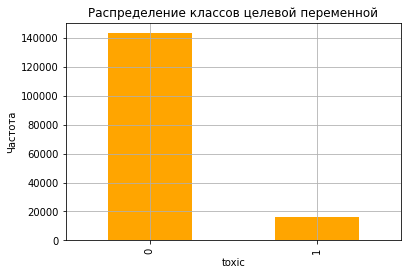

In [9]:
new_toxic_comments['toxic'].value_counts().plot(kind='bar', 
                                                color='Orange',
                                                xlabel='toxic', 
                                                ylabel='Частота', 
                                                title='Распределение классов целевой переменной');
plt.grid()

Text(0.5, 1.0, 'Распределение типов коментариев')

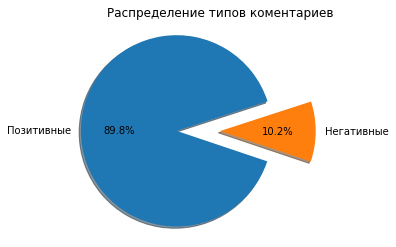

In [10]:
plt.pie(new_toxic_comments['toxic'].value_counts(),
       labels=['Позитивные', 'Негативные'],
       autopct='%1.1f%%',
       startangle=18,
       explode=(0.5, 0),
       shadow=True,
       radius=1.10)
plt.title('Распределение типов коментариев')

- в исходной выборке наблюдается несбалансированность классов

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Мы обнаружили серьёзный дисбаланс при исследовании данных. Как дополнительные материалы, рекомендую статью <a href='https://dyakonov.org/2021/05/27/imbalance/'>Дисбаланс классов</a>, очень классная, как и весь блог Дьяконова. Ещё такой <a href='https://github.com/Dyakonov/ml_hacks/blob/master/book_disbalance_public_v1.ipynb'>ноутбук</a> есть.</font>

**Выполним лемматизацию текста и устраним ненужные символы**

In [11]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package omw-1.4 to /home/jovyan/nltk_data...


True

In [12]:
#функция для проставления pos-тегов, чтобы у слов правильно определялась часть речи
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)


#функция для лемматизации слов
def lemmatize(text):
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(text)]
    lemmatized_words = " ".join(lemmatized_words)
    
    return lemmatized_words


#функция для очистки текста от знаков препинания, приведение к нижнему регистру 
def clear_text(text):
    text = text.lower()
    text = contractions.fix(text)
    text = re.sub(r'[^a-zA-Z\' ]', ' ', text)
    text = text.replace('\n', '')
    text_join = " ".join(text.split())
    return text_join


#очистка текста
new_toxic_comments['clean_text'] = new_toxic_comments['text'].apply(clear_text)

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Хороший выбор Лемматизатора! Про другие инструменты для лемматизации можно почитать [тут](https://webdevblog.ru/podhody-lemmatizacii-s-primerami-v-python/)</font>

In [13]:
new_toxic_comments.head()

,text,toxic,clean_text
0,Explanation\nWhy the edits made under my usern...,0,explanation why the edits made under my userna...
1,D'aww! He matches this background colour I'm s...,0,d'aww he matches this background colour i am s...
2,"Hey man, I'm really not trying to edit war. It...",0,hey man i am really not trying to edit war it ...
3,"""\nMore\nI can't make any real suggestions on ...",0,more i cannot make any real suggestions on imp...
4,"You, sir, are my hero. Any chance you remember...",0,you sir are my hero any chance you remember wh...


<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Очистка сделана верно! Мы оставили только символы Латинского алфавита и привели к нижнему регистру!</font>

In [14]:
#лемматизация текста
new_toxic_comments['lemm_text'] = new_toxic_comments['clean_text'].progress_apply(lemmatize)

  0%|          | 0/159292 [00:00<?, ?it/s]

In [15]:
new_toxic_comments.head()

,text,toxic,clean_text,lemm_text
0,Explanation\nWhy the edits made under my usern...,0,explanation why the edits made under my userna...,explanation why the edits make under my userna...
1,D'aww! He matches this background colour I'm s...,0,d'aww he matches this background colour i am s...,d'aww he match this background colour i be see...
2,"Hey man, I'm really not trying to edit war. It...",0,hey man i am really not trying to edit war it ...,hey man i be really not try to edit war it be ...
3,"""\nMore\nI can't make any real suggestions on ...",0,more i cannot make any real suggestions on imp...,more i can not make any real suggestion on imp...
4,"You, sir, are my hero. Any chance you remember...",0,you sir are my hero any chance you remember wh...,you sir be my hero any chance you remember wha...


<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Здорово что выводишь данные, так удобно отлаживать код, сразу видно, что функция работает корректно.</font>

**Разделение на тренировочную и тестовую выборки**

In [16]:
X = new_toxic_comments.drop(['toxic'], axis=1)
y = new_toxic_comments['toxic']

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=TEST_SIZE, 
    random_state=RANDOM_STATE
)


In [17]:
corpus_train = X_train['lemm_text'].values
corpus_test = X_test['lemm_text'].values


print(corpus_train.shape, corpus_test.shape)
print(y_train.shape, y_test.shape)

(143362,) (15930,)
(143362,) (15930,)


<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Здорово , что у нас есть выборка для тестов!</font>

**Токенизация столбца с подготовленным текстом**

In [18]:
# stop_words = list(stopwords.words('english'))
# count = TfidfVectorizer(stop_words=stop_words)
# tf_idf_train = count.fit_transform(X_train['lemm_text'])
# tf_idf_test = count.transform(X_test['lemm_text'])

In [18]:
STOPWORDS = list(stopwords.words('english'))
count = TfidfVectorizer(stop_words=STOPWORDS)
tf_idf_train = count.fit_transform(corpus_train)
tf_idf_test = count.transform(corpus_test)

print(tf_idf_train.shape, tf_idf_test.shape)

(143362, 142761) (15930, 142761)


<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Убрали частые неинформативные слова!</font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'> ~~Ниже ты используешь кроссвалидацию, в этом случае нужно соединить Векторизатор с моделью через Pipeline, что бы не происходило утечек во время кроссвалидации. Сейчас Векторизатор обучен на всех данных участвующих в кроссвалидации.~~<br> Материалы по Pipeline:<br> [О Пайплайн](https://dzen.ru/a/YBBkKJBsUV9MPret)<br>

[Примеры работы с текстами](https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_text_feature_extraction.html)</font>

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>Объединил и настроил векторизатор с моделями через pipeline</font>
</div>


<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'>Классно, что используешь pipeline. Так можно избежать утечек даже при кроссвалидации моделей. \
С Pipeline можно подбирать гиперпараметры не только к классификатору, но и к предобработчикам.</font>

**Вывод:**

- данные загрузились корректно
- столбец `Unnamed: 0` не несет никакой информации, его стоит убрать. Возможно это старый индекс от которого забыли избавиться
- по общей информации видно, что пропуски отсутствуют
- типы в датасете отображаются верно
- в исходной выборке наблюдается несбалансированность классов: 
    - позитивных - 89.8%
    - негативных - 10.2%
- выполнили лемматизацию текста
- устраним ненужные символы
- разделили на тренировочную и тестовую выборки
- выполнена токенизация столбца с подготовленным текстом

## Обучение

**LogisticRegression**

In [20]:
# model_lr = LogisticRegression(solver='liblinear', random_state=RANDOM_STATE)

# param_lr = {
#     'penalty': ['l1', 'l2'],
#     'C': list(range(1, 15, 3))
# }

# randomized_search_lr = RandomizedSearchCV(
#     model_lr,
#     param_lr,
#     cv=5,
#     scoring='f1',
#     n_jobs=-1
# ).fit(tf_idf_train, y_train)

# print(f'Параметры лучшей модели: {randomized_search_lr.best_params_}')
# print(f'Метрика f1 для лучшей модели на тренировочной выборке: {round(randomized_search_lr.best_score_, 3)}')


Параметры лучшей модели: {'penalty': 'l1', 'C': 4}
Метрика f1 для лучшей модели на тренировочной выборке: 0.773


In [19]:
pipeline = Pipeline([
    ('tf_idf', TfidfVectorizer(stop_words=STOPWORDS)),
    ('lr', LogisticRegression())
])

param = {
    'tf_idf__min_df': range(1, 3, 1),
    'lr__C': [1, 10],
    'lr__solver': ['newton-cg', 'liblinear']
}

rand_search_cv_lr = RandomizedSearchCV(pipeline, param, verbose=5, scoring='f1')

rand_search_cv_lr.fit(corpus_train, y_train)

print(f'Параметры лучшей модели: {rand_search_cv_lr.best_params_}')
print(f'Метрика f1 для лучшей модели на тренировочной выборке: {round(rand_search_cv_lr.best_score_, 3)}')


Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END lr__C=1, lr__solver=newton-cg, tf_idf__min_df=1; total time=  27.6s
[CV 2/5] END lr__C=1, lr__solver=newton-cg, tf_idf__min_df=1; total time=  27.4s
[CV 3/5] END lr__C=1, lr__solver=newton-cg, tf_idf__min_df=1; total time=  27.3s
[CV 4/5] END lr__C=1, lr__solver=newton-cg, tf_idf__min_df=1; total time=  26.6s
[CV 5/5] END lr__C=1, lr__solver=newton-cg, tf_idf__min_df=1; total time=  26.7s
[CV 1/5] END lr__C=1, lr__solver=newton-cg, tf_idf__min_df=2; total time=  22.0s
[CV 2/5] END lr__C=1, lr__solver=newton-cg, tf_idf__min_df=2; total time=  21.5s
[CV 3/5] END lr__C=1, lr__solver=newton-cg, tf_idf__min_df=2; total time=  19.9s
[CV 4/5] END lr__C=1, lr__solver=newton-cg, tf_idf__min_df=2; total time=  23.1s
[CV 5/5] END lr__C=1, lr__solver=newton-cg, tf_idf__min_df=2; total time=  20.7s
[CV 1/5] END lr__C=1, lr__solver=liblinear, tf_idf__min_df=1; total time=  14.0s
[CV 2/5] END lr__C=1, lr__solver=liblinear, tf_id

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Здорово что оценка кроссвалидацией.</font>

**DecisionTreeClassifier**

In [24]:
# pipe_final_dtc = Pipeline([
#     ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
# ])

# param_grid_dtc = {
#     'models__max_depth': [4, 6, 8]
# }

# grid_search_cv_dtc = GridSearchCV(
#     pipe_final_dtc,
#     param_grid_dtc,
#     cv=5,
#     scoring='f1'
# ).fit(tf_idf_train, y_train)

# print(f'Параметры лучшей модели\n: {grid_search_cv_dtc.best_params_}')
# print(f'Метрика f1 для лучшей модели на тренировочной выборке: {round(grid_search_cv_dtc.best_score_, 3)}')


Параметры лучшей модели
: {'models__max_depth': 8}
Метрика f1 для лучшей модели на тренировочной выборке: 0.583


In [20]:
pipeline_dtc = Pipeline([
    ('tf_idf', TfidfVectorizer(stop_words=STOPWORDS)),
    ('dtc', DecisionTreeClassifier())
])

param_dtc = {
    'tf_idf__min_df': range(1, 3, 1),
    'dtc__max_depth': [4, 6, 8]
}

grid_cv_dtc = GridSearchCV(pipeline_dtc, param_dtc, cv=5, scoring='f1')

grid_cv_dtc.fit(corpus_train, y_train)

print(f'Параметры лучшей модели: {grid_cv_dtc.best_params_}')
print(f'Метрика f1 для лучшей модели на тренировочной выборке: {round(grid_cv_dtc.best_score_, 3)}')


Параметры лучшей модели: {'dtc__max_depth': 8, 'tf_idf__min_df': 1}
Метрика f1 для лучшей модели на тренировочной выборке: 0.584


<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span> ✔️\
<span style="color: green"> 👍</span>

**LinearSVC**

In [25]:
# pipe_final_lsvc = Pipeline([
#     ('model', LinearSVC(random_state=RANDOM_STATE))
# ])

# param_grid_lsvc = [{
#     'model': [LinearSVC(random_state=RANDOM_STATE)],
#     'model__C': list(range(15, 20, 1))
# }]

# grid_search_lsvc = GridSearchCV(
#     pipe_final_lsvc,
#     param_grid_lsvc,
#     cv=5,
#     scoring='f1',
#     n_jobs=-1
# ).fit(tf_idf_train, y_train)

# print(f'Параметры лучшей модели: {grid_search_lsvc.best_params_}')
# print(f'Метрика f1 для лучшей модели на тренировочной выборке: {round(grid_search_lsvc.best_score_, 3)}')


Параметры лучшей модели: {'model': LinearSVC(C=15, random_state=42), 'model__C': 15}
Метрика f1 для лучшей модели на тренировочной выборке: 0.734


In [21]:
pipeline_lsvc = Pipeline([
    ('tf_idf', TfidfVectorizer(stop_words=STOPWORDS)),
    ('lsvc', LinearSVC())
])

param_lsvc = {
    'tf_idf__min_df': range(1, 3, 1),
    'lsvc__C': list(range(15, 20, 1)),
    'lsvc': [LinearSVC(random_state=RANDOM_STATE)]
}

grid_cv_lsvc = GridSearchCV(pipeline_lsvc, param_lsvc, cv=5, scoring='f1', n_jobs=-1)

grid_cv_lsvc.fit(corpus_train, y_train)

print(f'Параметры лучшей модели: {grid_cv_lsvc.best_params_}')
print(f'Метрика f1 для лучшей модели на тренировочной выборке: {round(grid_cv_lsvc.best_score_, 3)}')


Параметры лучшей модели: {'lsvc': LinearSVC(C=15, random_state=42), 'lsvc__C': 15, 'tf_idf__min_df': 1}
Метрика f1 для лучшей модели на тренировочной выборке: 0.736


<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span> ✔️\
<span style="color: green"> 👍</span>

**Тестовая метрика**

По результатам кросс-валидации и поиска лучшей модели была выбрана модель логистической регрессии. Рассчитаем с помощью неёё метрику на тестовой выборке.

In [22]:
predict_lr = rand_search_cv_lr.best_estimator_.predict(corpus_test)
print(f'Метрика f1 на тестовой выборке для логистической регрессии: \
      {round(f1_score(y_test, predict_lr), 3)}')

Метрика f1 на тестовой выборке для логистической регрессии:       0.781


<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Тестирование проведено верно.</font>

**Вывод:**


- Обучили 3 модели:
    - `LogisticRegression`: метрика f1 для лучшей модели на тренировочной выборке: 0.773
    - `DecisionTreeClassifier` : метрика f1 для лучшей модели на тренировочной выборке: 0.583
    - `LinearSVC`: метрика f1 для лучшей модели на тренировочной выборке: 0.734

- Тестовая метрика лучшей модели:
     - `LogisticRegression`: Метрика f1 на тестовой выборке для логистической регрессии:  0.787

<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span> ✔️\
<span style="color: green"> 👍</span>

## Выводы

- данные загрузились корректно
- столбец `Unnamed: 0` не несет никакой информации, его стоит убрать. Возможно это старый индекс от которого забыли избавиться
- по общей информации видно, что пропуски отсутствуют
- типы в датасете отображаются верно
- в исходной выборке наблюдается несбалансированность классов: 
    - позитивных - 89.8%
    - негативных - 10.2%
- выполнили лемматизацию текста
- устраним ненужные символы
- разделили на тренировочную и тестовую выборки
- выполнена токенизация столбца с подготовленным текстом

- Обучили 3 модели:
    - `LogisticRegression`: метрика f1 для лучшей модели на тренировочной выборке: 0.773
    - `DecisionTreeClassifier` : метрика f1 для лучшей модели на тренировочной выборке: 0.583
    - `LinearSVC`: метрика f1 для лучшей модели на тренировочной выборке: 0.734

- Тестовая метрика лучшей модели:
     - `LogisticRegression`: Метрика f1 на тестовой выборке для логистической регрессии:  0.783
     

**Рекомендация: для интернет-магазин «Викишоп» подойдет модель `LogisticRegression` со значернием метрики `F1 = 0.773` которая удовлетворяет условию поставленной задачи. Она поможет найти токсичные коментарии, чтобы отправить их на модерацию.**


<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Очень приятно видеть вывод в конце проекта!\
Приведены ответы на главные вопросы проекта.</font>

<font color='blue'><b>Итоговый комментарий ревьюера</b></font>\
<font color='green'>Армен, хороший проект получился!
Большое спасибо за проделанную работу. Видно, что приложено много усилий.
</font>

<font color='blue'>Что нужно исправить:</font>
<ul><font color='red'>Поправь векторизацию при кросс-валидации.</font></ul>

<font color='blue'><b>Жду новую версию проекта :)</b></font>

<font color='blue'><b>Итоговый комментарий ревьюера 2</b></font>\
<font color='green'> Армен, проект принят! \
Все этапы пройдены. Все рекомендации учтены.\
Надеюсь, тебе понравился процесс выполнения и результат.</font> \
<font color='blue'><b>Спасибо, удачи в освоении профессии!</b></font>

<font color='green'><b>Полезные (и просто интересные) материалы:</b> \
Для работы с текстами используют и другие подходы. Например, сейчас активно используются RNN (LSTM) и трансформеры (BERT и другие с улицы Сезам, например, ELMO). НО! Они не являются панацеей, не всегда они нужны, так как и TF-IDF или Word2Vec + модели из классического ML тоже могут справляться. \
BERT тяжелый, существует много его вариаций для разных задач, есть готовые модели, есть надстройки над библиотекой transformers. Если, обучать BERT на GPU (можно в Google Colab или Kaggle), то должно быть побыстрее.\
https://huggingface.co/transformers/model_doc/bert.html \
https://colah.github.io/posts/2015-08-Understanding-LSTMs/ - Про LSTM \
https://web.stanford.edu/~jurafsky/slp3/10.pdf - про энкодер-декодер модели, этеншены\
https://pytorch.org/tutorials/beginner/transformer_tutorial.html - официальный гайд
по трансформеру от создателей pytorch\
Библиотеки: allennlp, fairseq, transformers, tensorflow-text — множествореализованных
методов для трансформеров методов NLP \
Word2Vec https://radimrehurek.com/gensim/models/word2vec.html

<font color='green'>Пример BERT с GPU:
```python
%%time
from tqdm import notebook
batch_size = 2 # для примера возьмем такой батч, где будет всего две строки датасета
embeddings = []
model.cuda()   # закидываем модель на GPU
for i in notebook.tqdm(range(input_ids.shape[0] // batch_size)):
        batch = torch.LongTensor(input_ids[batch_size*i:batch_size*(i+1)]).cuda() # закидываем тензор на GPU
        attention_mask_batch = torch.LongTensor(attention_mask[batch_size*i:batch_size*(i+1)]).cuda()

        with torch.no_grad():
            batch_embeddings = model(batch, attention_mask=attention_mask_batch)

        embeddings.append(batch_embeddings[0][:,0,:].cpu().numpy()) # перевод обратно на проц, чтобы в нумпай кинуть
        del batch
        del attention_mask_batch
        del batch_embeddings

features = np.concatenate(embeddings)
```
Можно сделать предварительную проверку на наличие GPU.\
Например, так: ```device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")```\
Тогда вместо .cuda() нужно писать .to(device)

Если понравилась работа с текстами, то можешь посмотреть очень интересный (но очень-очень сложный) курс лекций: https://github.com/yandexdataschool/nlp_course .


NLP от Samsung https://stepik.org/course/54098/promo \
NLP от Huawei https://ods.ai/tracks/nlp-course-spring-2024 \
Transformers от Hugging Face https://huggingface.co/learn/nlp-course/ru/chapter1/1
</font>

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Модели обучены
- [x]  Значение метрики *F1* не меньше 0.75
- [x]  Выводы написаны